In [1]:
import supereeg as se
import pandas as pd
import numpy as np
import os
import hypertools as hyp
import plot as plot
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import plotting as ni_plt

In [2]:
fig_dir = '/Users/lucyowen/repos/supereeg_paper/paper_figs/supplemental'

In [3]:
fig_count = 0

# PyFR analysis

In [4]:
pyfr_across = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/pyfr/pyfr_across.csv', index_col=0)
pyfr_within = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/pyfr/pyfr_within.csv', index_col=0)

## Merge dataframes

In [5]:
pyFR_df = pd.merge(pyfr_across, pyfr_within, on=['Subject', 'R'])
pyFR_df.dropna(inplace=True)
pyFR_df.rename(columns={"Correlation_x":"Correlation_Across", "Correlation_y":"Correlation_Within"}, inplace=True)
e_corrs = pd.DataFrame()
e_corrs['across'] = plot.r2z(pyFR_df['Correlation_Across'])
e_corrs['within'] = plot.r2z(pyFR_df['Correlation_Within'])
e_corrs['Subject'] = pyFR_df['Subject']
e_corrs['R'] = pyFR_df['R']

## Across vs within subject analysis

In [6]:
pyfr_locs = plot.compile_df_locs(pyfr_across['R'])
corr_pyfr_locs = np.atleast_2d(pyfr_across['Correlation'])

In [7]:
long_form_across = pd.DataFrame()
long_form_across['Correlation'] = pyFR_df['Correlation_Across']
long_form_across['Subject'] = 'a'
long_form_across['Experiment'] = 'w'
long_form_within = pd.DataFrame()
long_form_within['Correlation'] = pyFR_df['Correlation_Within']
long_form_within['Subject'] = 'w'
long_form_within['Experiment'] = 'w'

In [8]:
long_form_pyfr = long_form_across.append(long_form_within)

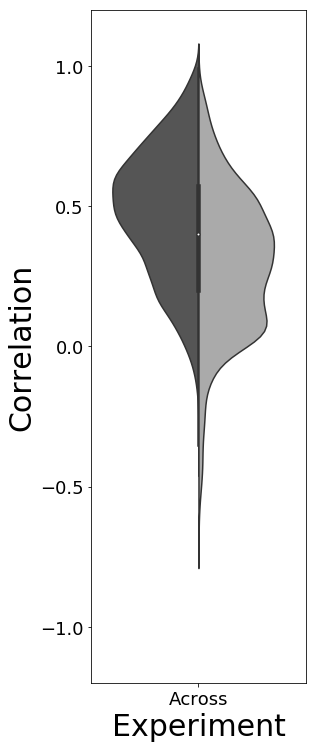

In [9]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
fig = plt.gcf()
fig.set_size_inches(4.5, 10.5)
plt.ylim(-1.2,1.2)
ax = sns.violinplot(x="Experiment", y="Correlation", hue="Subject", ylim=[-1,1], data=long_form_pyfr, palette="gray", split=True)
ax.legend().set_visible(False)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.set_xticklabels(['Across', 'All', 'Within'])
ax.set_ylabel('Correlation', fontsize=30)
ax.set_xlabel('Experiment', fontsize=30)

plt.tight_layout()
plt.savefig(outfile)

# RAM

In [10]:
W_a_a = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/within/a_sub-a_exp.csv', index_col=0)
W_a_a.name = 'W_a_a'
W_a_all = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/within/a_sub-all_exp.csv', index_col=0)
W_a_all.name = 'W_a_all'
W_a_w = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/within/a_sub-w_exp.csv', index_col=0)
W_a_w.name = 'W_a_w'
W_w_a = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/within/w_sub-a_exp.csv', index_col=0)
W_w_a.name = 'W_w_a'
W_w_all = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/within/w_sub-all_exp.csv', index_col=0)
W_w_all.name = 'W_w_all'
W_w_w = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/within/w_sub-w_exp.csv', index_col=0)
W_w_w.name = 'W_w_w'

In [11]:
dfs = [W_a_a, W_a_all, W_a_w, W_w_a, W_w_all, W_w_w]

In [12]:
RAM_df = dfs[0]
RAM_df = RAM_df.rename(columns={"Correlation":RAM_df.name})
for df_ in dfs[1:]:
    RAM_df = RAM_df.merge(df_, on=['Subject', 'R'])
    
    RAM_df = RAM_df.rename(columns={"Correlation":df_.name})

In [13]:
RAM_df.head()

,R,W_a_a,Subject,W_a_all,W_a_w,W_w_a,W_w_all,W_w_w
0,[-50.39 18.22 -43.3 ],0.242494,R1083J_RAM_CatFR1_2,0.300987,0.447637,-0.162586,0.236228,0.061755
1,[-46.17 18.21 -42.23],0.177056,R1083J_RAM_CatFR1_1,0.046046,0.478972,0.165845,0.275166,0.292074
2,[-57.19 19.07 -44.75],0.234188,R1083J_RAM_CatFR1_4,0.788364,0.916196,0.542039,-0.021315,0.117429
3,[-43.21 18.21 -41.49],0.336156,R1083J_RAM_CatFR1_0,0.536711,0.796827,0.005241,-0.211179,0.046857
4,[-54.86 15.87 40.38],0.024989,R1032D_RAM_FR1_3,0.426785,0.232029,0.187670,0.312530,0.378536


In [14]:
RAM_df.dropna(inplace=True)

In [15]:
RAM_df.shape

(2975, 8)

In [16]:
column_corrs = []
for d in dfs:
    column_corrs.append(d.name)

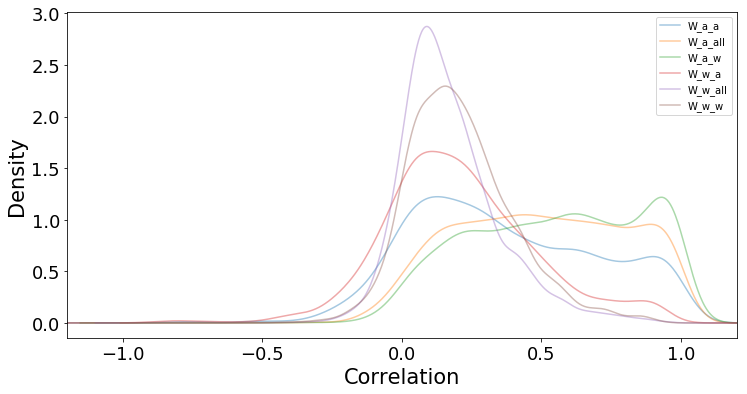

In [17]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')

ax = RAM_df[column_corrs].plot(kind='kde', figsize=[12,6], alpha=.4, legend=True, xlim=(-1.2, 1.2))
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.set_ylabel('Density', fontsize=21)
ax.set_xlabel('Correlation', fontsize=21)
plt.savefig(outfile)

In [18]:
def long_form_df(full_df, df_col):

    long_form = pd.DataFrame()
    long_form['Correlation'] = full_df[df_col.name]
    long_form['Subject'] = df_col.name.split('_')[1]
    long_form['Experiment'] = df_col.name.split('_')[2]
    
    return long_form

long_form = long_form_df(RAM_df, dfs[0])
for df_ in dfs[1:]:
    long_form = long_form.append(long_form_df(RAM_df, df_))


In [19]:
long_form.head()

,Correlation,Subject,Experiment
0,0.242494,a,a
1,0.177056,a,a
2,0.234188,a,a
3,0.336156,a,a
4,0.024989,a,a


## plot all patients that participated in both experiments

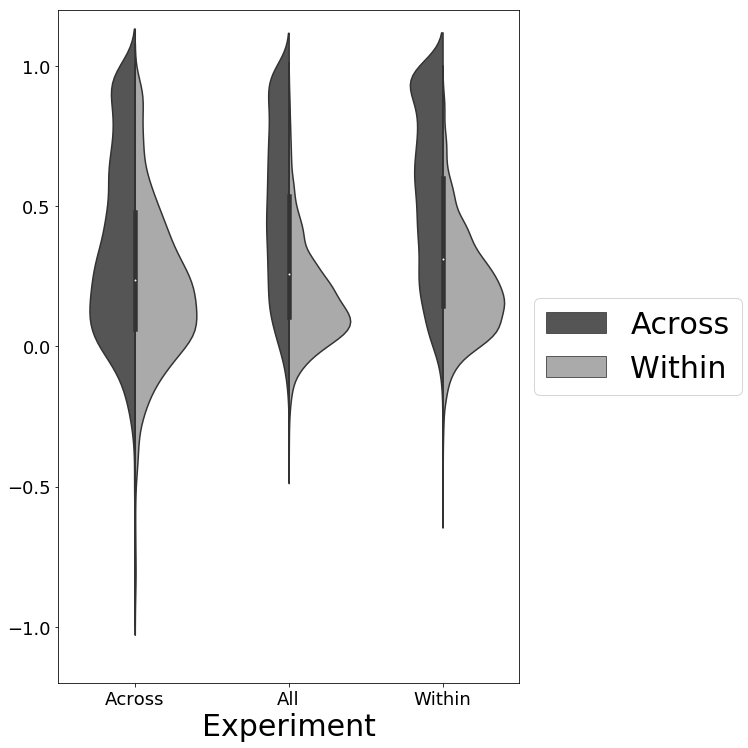

In [20]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_split_violin(long_form, yticks=False, outfile=outfile)

## FR

In [21]:
str_find = '_FR1_'
str_find
FR_df = RAM_df[RAM_df['Subject'].str.contains(str_find)]

In [22]:
fr_locs = plot.compile_df_locs(FR_df['R'])

In [23]:
fr_subject = np.array([])
fr_within = np.array([])
fr_across = np.array([])
fr_R = np.array([])
for i , item in enumerate(FR_df['Subject'].values):
    #print(item.split('_')[0])
    fr_subject = np.append(fr_subject, item.split('_')[0])
    fr_within = np.append(fr_within, FR_df['W_w_w'].iloc[i])
    fr_across = np.append(fr_across, FR_df['W_a_w'].iloc[i])
    fr_R = np.append(fr_R, FR_df['R'].iloc[i])

In [24]:
corr_fr_df = pd.DataFrame()
corr_fr_df['Subject'] = fr_subject
corr_fr_df['W_w_w'] = plot.r2z(fr_within)
corr_fr_df['W_a_w'] = plot.r2z(fr_across)
corr_fr_df['R'] = fr_R

In [25]:
fr_locs = plot.compile_df_locs(corr_fr_df['R'])

In [26]:
long_formFR = long_form_df(FR_df, dfs[0])
for df_ in dfs[1:]:
    long_formFR = long_formFR.append(long_form_df(FR_df, df_))


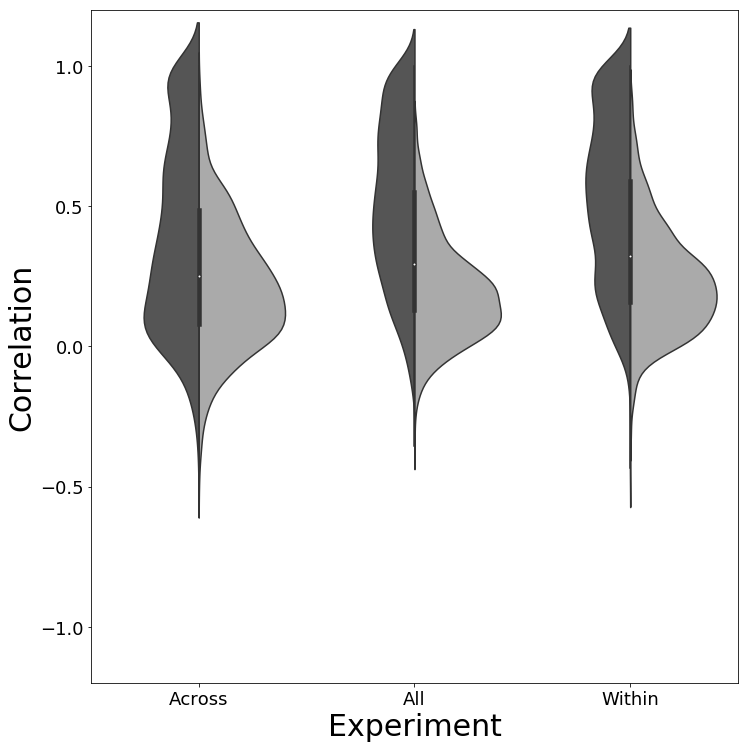

In [27]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_split_violin(long_formFR, legend=False, outfile=outfile)

## CatFR

In [28]:
str_find = '_CatFR1_'
str_find
CatFR_df = RAM_df[RAM_df['Subject'].str.contains(str_find)]

In [29]:
catfr_subject = np.array([])
catfr_within = np.array([])
catfr_across = np.array([])
catfr_R = np.array([])
for i , item in enumerate(CatFR_df['Subject'].values):
    #print(item.split('_')[0])
    catfr_subject = np.append(catfr_subject, item.split('_')[0])
    catfr_within = np.append(catfr_within, CatFR_df['W_w_w'].iloc[i])
    catfr_across = np.append(catfr_across, CatFR_df['W_a_w'].iloc[i])
    catfr_R = np.append(catfr_R, CatFR_df['R'].iloc[i])

In [30]:
corr_catfr_df = pd.DataFrame()
corr_catfr_df['Subject'] = catfr_subject
corr_catfr_df['W_w_w'] = plot.r2z(catfr_within)
corr_catfr_df['W_a_w'] = plot.r2z(catfr_across)
corr_catfr_df['R'] = catfr_R

In [31]:
catfr_locs = plot.compile_df_locs(corr_catfr_df['R'])

In [32]:
long_formCatFR = long_form_df(CatFR_df, dfs[0])
for df_ in dfs[1:]:
    long_formCatFR = long_formCatFR.append(long_form_df(CatFR_df, df_))


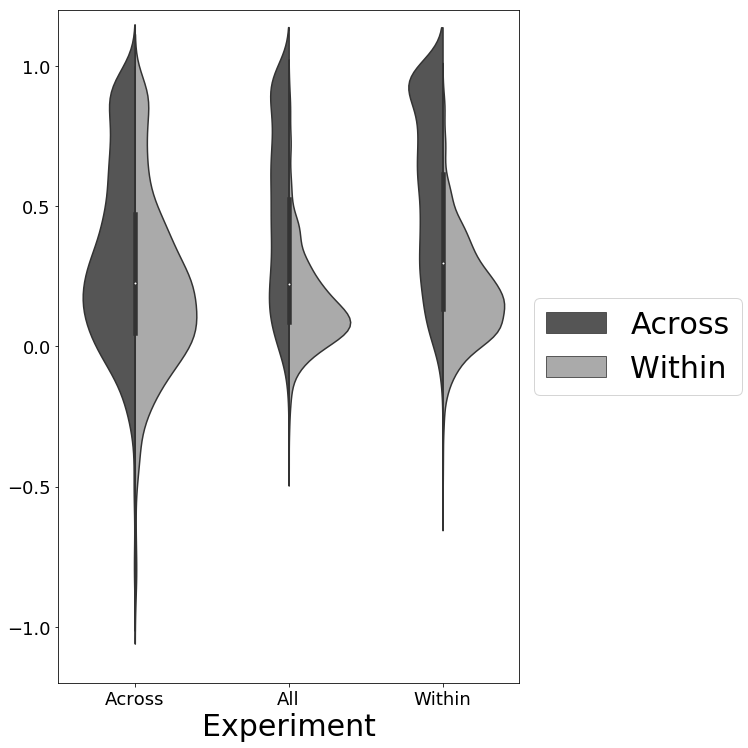

In [33]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_split_violin(long_formCatFR, yticks=False, outfile=outfile)

## Across

In [34]:
A_a_a = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/across/a_sub-a_exp.csv', index_col=0)
A_a_a.name = 'A_a_a'
A_a_all = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/across/a_sub-all_exp.csv', index_col=0)
A_a_all.name = 'A_a_all'
A_a_w = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/across/a_sub-w_exp.csv', index_col=0)
A_a_w.name = 'A_a_w'
A_w_a = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/across/w_sub-a_exp.csv', index_col=0)
A_w_a.name = 'A_w_a'
A_w_all = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/across/w_sub-all_exp.csv', index_col=0)
A_w_all.name = 'A_w_all'
A_w_w = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/across/w_sub-w_exp.csv', index_col=0)
A_w_w.name = 'A_w_w'

In [35]:
dfs_2 = [A_a_a, A_a_all, A_a_w, A_w_w]

In [36]:
RAM_df_2 = dfs_2[0]
RAM_df_2 = RAM_df_2.rename(columns={"Correlation":RAM_df_2.name})
for df_ in dfs_2[1:]:
    RAM_df_2 = RAM_df_2.merge(df_, on=['Subject', 'R'])
    RAM_df_2 = RAM_df_2.rename(columns={"Correlation":df_.name})

In [37]:
RAM_df_2.dropna(inplace=True)

In [38]:
column_corrs = []
for d in dfs_2:
    column_corrs.append(d.name)

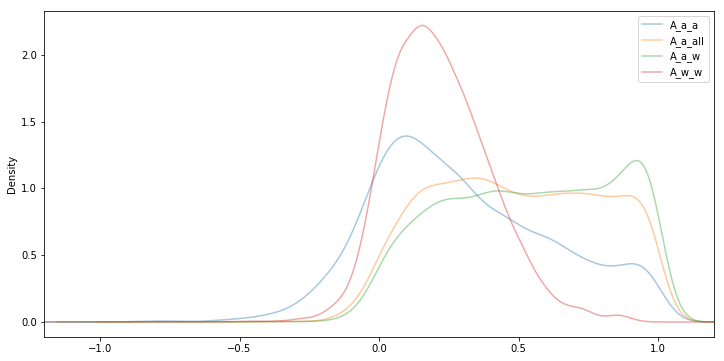

In [39]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')

RAM_df_2[column_corrs].plot(kind='kde', figsize=[12,6], alpha=.4, legend=True, xlim=(-1.2, 1.2))
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.set_ylabel('Density', fontsize=21)
ax.set_xlabel('Correlation', fontsize=21)
plt.savefig(outfile)

In [40]:
long_formRAM = long_form_df(RAM_df_2, dfs_2[0])
for df_ in dfs_2[1:]:
    long_formRAM = long_formRAM.append(long_form_df(RAM_df_2, df_))


In [41]:
long_form_within = pd.DataFrame()
long_form_within = long_form_df(RAM_df, dfs[3])
for df_ in dfs[4:5]:
    long_form_within  = long_form_within.append(long_form_df(RAM_df, df_))

In [42]:
long_formRAM = long_formRAM.append(long_form_within)

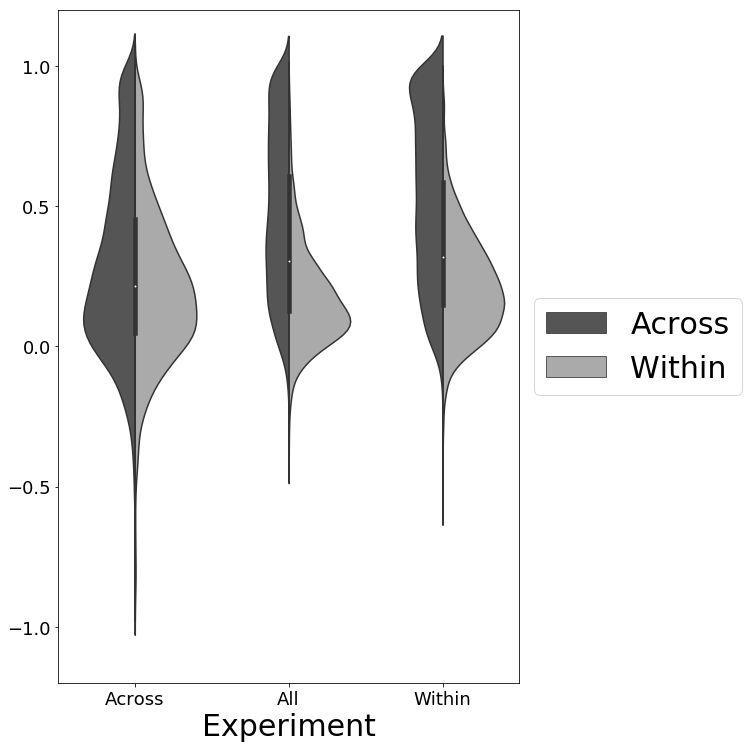

In [43]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_split_violin(long_formRAM, yticks=False, outfile=outfile)